## Import Libraries

In [1]:
# import Libraries
import pandas as pd
import sweetviz as sv
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as snsa
import scipy
import chardet
import datetime as dt

## Import Data

In [2]:
df=pd.read_excel(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\02 Data\02 Prepared\Combined\age_group.xlsx",index_col=False)

## Inspect Dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1488 non-null   int64  
 1   state           1488 non-null   object 
 2   age_group       1488 non-null   object 
 3   covid_cases     1075 non-null   float64
 4   suicide_deaths  1187 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 58.2+ KB


In [10]:
df.head()

,year,state,age_group,covid_cases,suicide_deaths
0,2019,Alabama,18-49,NaN,25.0
1,2019,Alabama,50-64,NaN,22.9
2,2019,Alabama,50-64,NaN,23.1
3,2019,Alabama,65+,NaN,20.9
4,2019,Alabama,65+,NaN,17.6


## Create correlation heat map

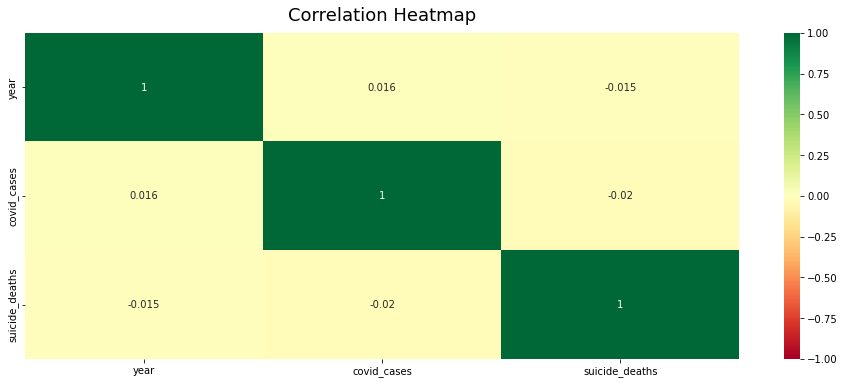

In [3]:
#use seaborn to create correlation heat map
df.corr().round(2)
matrix = df.corr().round(2)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('age_groups_heatmap.png', dpi=300, bbox_inches='tight')

In [4]:
# create a second dataframe with only overlapping values to see if there is any difference in correlation 
values=[2019,2022]
df2=df[df.year.isin(values)==False]

In [5]:
# inspect dataframe
df2.head()

,year,state,age_group,covid_cases,suicide_deaths
396,2020,Alabama,18-49,140794.0,25.5
397,2020,Alabama,50-64,56072.0,19.3
398,2020,Alabama,50-64,56072.0,20.6
399,2020,Alabama,65+,45457.0,18.5
400,2020,Alabama,65+,45457.0,14.4


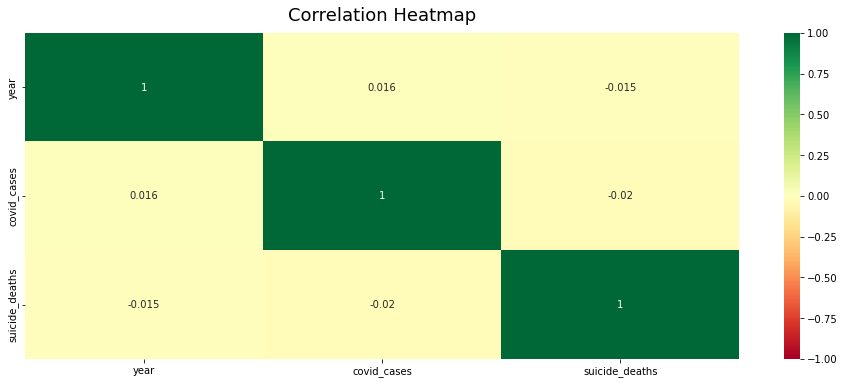

In [6]:
# use seaborn to create correlation heat map of second dataframe
df2.corr().round(2)
matrix = df2.corr().round(2)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('age_groups_heatmap2.png', dpi=300, bbox_inches='tight')

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
Based on the coeffients there is almost no correlation between the number of covid cases and the number of suidice deaths based on age groups. The second dataframe with only overlapping values from 2020 and 2021 does not show any differenece in correlation.

## Create Scatter plot

<AxesSubplot:xlabel='covid_cases', ylabel='suicide_deaths'>

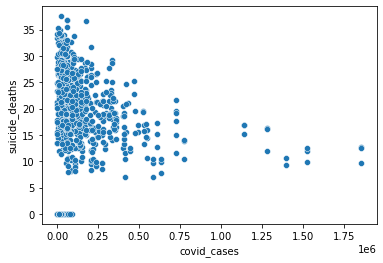

In [7]:
# use seaborn to create scatter plot of main dataframe
sns.scatterplot(x = 'covid_cases', y = 'suicide_deaths',data = df)

<AxesSubplot:xlabel='covid_cases', ylabel='suicide_deaths'>

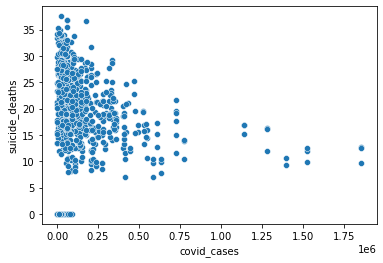

In [8]:
#use seaborn to create scatter plot of secondary dataframe
sns.scatterplot(x = 'covid_cases', y = 'suicide_deaths',data = df2)

### Examine the nature of their relationships based on scatter plots.
Based on the scatter plot the variables (suicide deaths and covid cases) possess a non-linear trend. There also still appears to be some outliers in the number of covid cases despite using IQR to filter outliers in previous scripts.

## Create pair plot

In [11]:
# Create a subset for pair plot
sub = df[['covid_cases','suicide_deaths']]

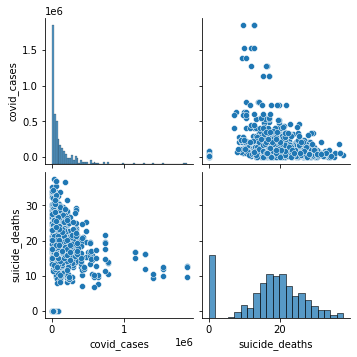

In [12]:
#use seaborn to create pair plot of main dataframe
g=sns.pairplot(sub)

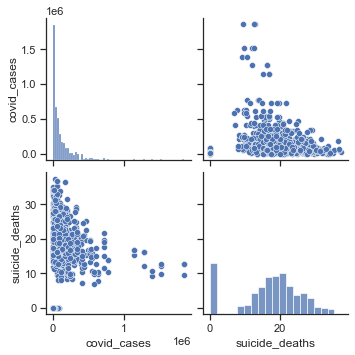

In [16]:
# Create a subset for pair plot from secondary dataframe
sub2 = df2[['covid_cases','suicide_deaths']]
#use seaborn to create pair plot of secondary dataframe
f=sns.pairplot(sub2)

### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.
The number of suicide deaths appears to have a fairly normal distribution whereas covid cases appears to be heavily right skewed. This may require further investigation as to why the covid data is so skewed.

# Create categorical plot

In [14]:
#inspect unique values in age_group
df['age_group'].value_counts()

65+        497
18-49      489
50-64      349
Unknown    153
Name: age_group, dtype: int64

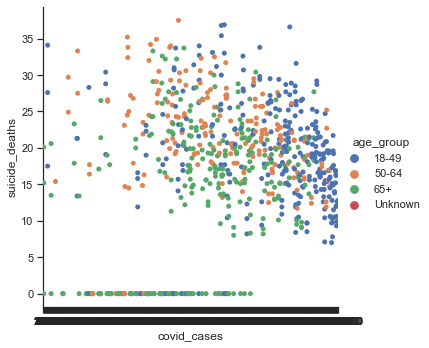

In [15]:
# Create a categorical plot in seaborn using the age groups created in main dataframe in previous scripts
sns.set(style="ticks")
h = sns.catplot(x="covid_cases", y="suicide_deaths", hue="age_group", data=df)

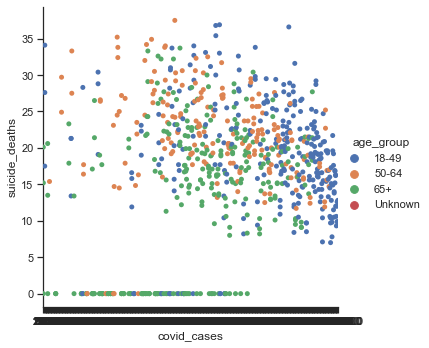

In [17]:
# Create a categorical plot in seaborn using the age groups created in secondary dataframe in previous scripts
sns.set(style="ticks")
i = sns.catplot(x="covid_cases", y="suicide_deaths", hue="age_group", data=df2)

### Interpret the results of categorical plots.
There seems to be no correlation between varialbles and age group categories